In [317]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
import keras.layers as layers
train = keras.utils.image_dataset_from_directory(
    'pictures', batch_size=32, validation_split=0.2, subset='training',
    seed=500, image_size=(150, 150)
)
test = keras.utils.image_dataset_from_directory(
    'pictures', batch_size=32, validation_split=0.2, subset='validation',
    seed=1000, image_size=(150, 150)
)

Found 375 files belonging to 3 classes.
Using 300 files for training.
Found 375 files belonging to 3 classes.
Using 75 files for validation.


In [318]:
print(train.class_names)
train = train.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test = test.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
model = keras.Sequential() 
model.add(layers.Rescaling(1./255, input_shape=(150, 150, 3))) 
model.add(layers.Conv2D(16, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D()) 
model.add(layers.Conv2D(32, (3,3), activation='relu')) 
model.add(layers.MaxPooling2D()) 
model.add(layers.Flatten()) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(3, activation='softmax'))
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
fitted_model = model.fit(train, validation_data=test, epochs=6)

['baking', 'classic', 'english']
Epoch 1/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - accuracy: 0.3379 - loss: 6.7339 - val_accuracy: 0.3867 - val_loss: 1.0561
Epoch 2/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - accuracy: 0.5094 - loss: 1.0291 - val_accuracy: 0.6267 - val_loss: 0.8174
Epoch 3/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.7367 - loss: 0.7472 - val_accuracy: 0.8533 - val_loss: 0.5057
Epoch 4/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 153ms/step - accuracy: 0.9040 - loss: 0.4199 - val_accuracy: 0.9333 - val_loss: 0.2722
Epoch 5/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.9657 - loss: 0.1816 - val_accuracy: 0.9467 - val_loss: 0.2075
Epoch 6/6
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9759 - loss: 0.0964 - val_accuracy: 0.9867 - val_loss: 0.0992


In [319]:
model.summary()

Model: "sequential_56"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_45 (Rescaling)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_112 (Conv2D)             │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 74, 74, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_113 (Conv2D)             │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 36, 36, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_56 (Flatten)            │ (None, 41472)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_112 (Dense)               │ (None, 256)            │    10,617,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_113 (Dense)               │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,868,843 (121.57 MB)

 Trainable params: 10,622,947 (40.52 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,245,896 (81.05 MB)

In [320]:
def picture(array, i, a, string):
    plt.grid = True
    plt.plot(array, i, label="train")
    plt.plot(array, a, label="test")
    plt.legend()
    plt.title(string)
    plt.show()

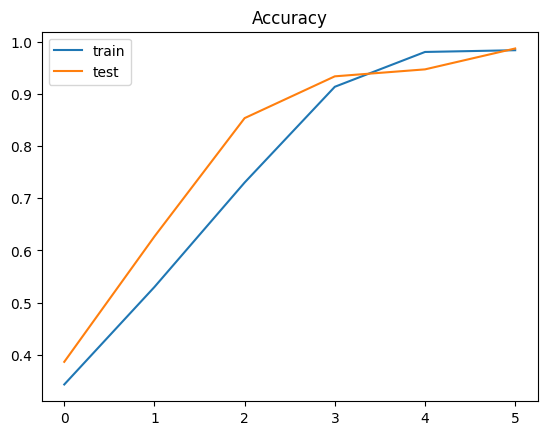

In [321]:
acc, v = fitted_model.history['accuracy'], fitted_model.history['val_accuracy']
picture(range(6), acc, v, 'Accuracy')